<a href="https://colab.research.google.com/github/varunsmhatre/TF-Developer/blob/main/CNN/FoodDataset_Transfer_learning_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading the data

In [3]:
# Get data (10% of labels)
import zipfile

# Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-04-05 17:17:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   225MB/s    in 0.7s    

2022-04-05 17:17:04 (225 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



## Preparing the data

In [4]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


## Import TF

In [5]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

## MobileNet Model

In [6]:
mobilenet_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [7]:
num_classes = 10
feature_extractor_layer = hub.KerasLayer(mobilenet_url,
                                          trainable=False, 
                                          name='feature_extraction_layer',
                                          input_shape=IMAGE_SHAPE+(3,))

# Create our own model
mobilenet_model = tf.keras.Sequential([
  feature_extractor_layer, 
  layers.Dense(num_classes, activation='softmax', name='output_layer')      
])

In [8]:
# Compile Model
mobilenet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [9]:
# Fit the model
mobilenet_history = mobilenet_model.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data))

Epoch 1/5
24/24 [==============================] - 32s 835ms/step - loss: 1.9846 - accuracy: 0.3147 - val_loss: 1.3410 - val_accuracy: 0.5904
Epoch 2/5
24/24 [==============================] - 18s 769ms/step - loss: 1.0393 - accuracy: 0.7080 - val_loss: 0.9012 - val_accuracy: 0.7416
Epoch 3/5
24/24 [==============================] - 18s 793ms/step - loss: 0.7362 - accuracy: 0.7920 - val_loss: 0.7443 - val_accuracy: 0.7772
Epoch 4/5
24/24 [==============================] - 18s 786ms/step - loss: 0.5829 - accuracy: 0.8440 - val_loss: 0.6860 - val_accuracy: 0.7920
Epoch 5/5
24/24 [==============================] - 18s 766ms/step - loss: 0.4862 - accuracy: 0.8773 - val_loss: 0.6361 - val_accuracy: 0.8052


In [10]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
# Code: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/04_transfer_learning_in_tensorflow_part_1_feature_extraction.ipynb
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

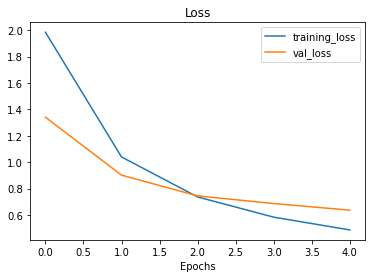

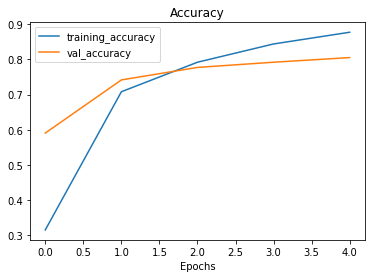

In [11]:
plot_loss_curves(mobilenet_history)